In [2]:
pip install pandas matplotlib seaborn python-dateutil


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv("netflix_india_yt_data.csv")

# Preview
print(df.head())
print(df.info())


      video_id                                              title  \
0  KQ2a4uawQBo  Meet THE REAL Honey Singh | Yo Yo Honey Singh:...   
1  bOR7S0j_wq8  ⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...   
2  GRM8Q-1fVJ0  Black Warrant | Official Teaser | Vikramaditya...   
3  b0b8WBglCHo  The Electric State | Official Trailer | Netfli...   
4  QCPOl_7cdnQ  The Electric State | Official Trailer | Hindi ...   

                                         description  \
0  Honey Singh shares his battles with mental hea...   
1  Brb taking notes on how to lie like a pro 👀\r\...   
2  India ki sabse khatarnaak jail mein, ek naya j...   
3  In the aftermath of the robot war, the only pa...   
4  In the aftermath of the robot war, the only pa...   

                                                tags           publishedAt  \
0  ['angreji beat', 'dope shope', 'honey singh', ...  2024-12-20T08:00:00Z   
1  ['aditya seal', 'akshay kumar', 'akshay kumar ...  2024-12-19T12:30:00Z   
2  ['netflix i

In [4]:
import re
from dateutil import parser

# 1️⃣ TagsCount
def count_tags(tag_str):
    if pd.isna(tag_str) or tag_str.strip() == "":
        return 0
    # Assuming tags are comma-separated
    return len(tag_str.split(","))

df["TagsCount"] = df["tags"].apply(count_tags)

# 2️⃣ DurationMinutes
def parse_duration(duration_str):
    """
    Converts ISO 8601 duration to total minutes.
    E.g., PT1H26M10S --> 86.17 minutes
    """
    if pd.isna(duration_str):
        return 0
    hours = re.findall(r"(\d+)H", duration_str)
    minutes = re.findall(r"(\d+)M", duration_str)
    seconds = re.findall(r"(\d+)S", duration_str)
    total_seconds = (
        int(hours[0]) * 3600 if hours else 0
    ) + (
        int(minutes[0]) * 60 if minutes else 0
    ) + (
        int(seconds[0]) if seconds else 0
    )
    return total_seconds / 60

df["DurationMinutes"] = df["duration"].apply(parse_duration)

# 3️⃣ Category: Short (<10 min) or Long (>=10 min)
df["Category"] = df["DurationMinutes"].apply(lambda x: "Short" if x < 10 else "Long")

# 4️⃣ TitleLength: Number of characters
df["TitleLength"] = df["title"].apply(lambda x: len(str(x)))


In [5]:
print(df.head())


      video_id                                              title  \
0  KQ2a4uawQBo  Meet THE REAL Honey Singh | Yo Yo Honey Singh:...   
1  bOR7S0j_wq8  ⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...   
2  GRM8Q-1fVJ0  Black Warrant | Official Teaser | Vikramaditya...   
3  b0b8WBglCHo  The Electric State | Official Trailer | Netfli...   
4  QCPOl_7cdnQ  The Electric State | Official Trailer | Hindi ...   

                                         description  \
0  Honey Singh shares his battles with mental hea...   
1  Brb taking notes on how to lie like a pro 👀\r\...   
2  India ki sabse khatarnaak jail mein, ek naya j...   
3  In the aftermath of the robot war, the only pa...   
4  In the aftermath of the robot war, the only pa...   

                                                tags           publishedAt  \
0  ['angreji beat', 'dope shope', 'honey singh', ...  2024-12-20T08:00:00Z   
1  ['aditya seal', 'akshay kumar', 'akshay kumar ...  2024-12-19T12:30:00Z   
2  ['netflix i

In [6]:
df.to_csv("netflix_india_yt_data_enriched.csv", index=False)


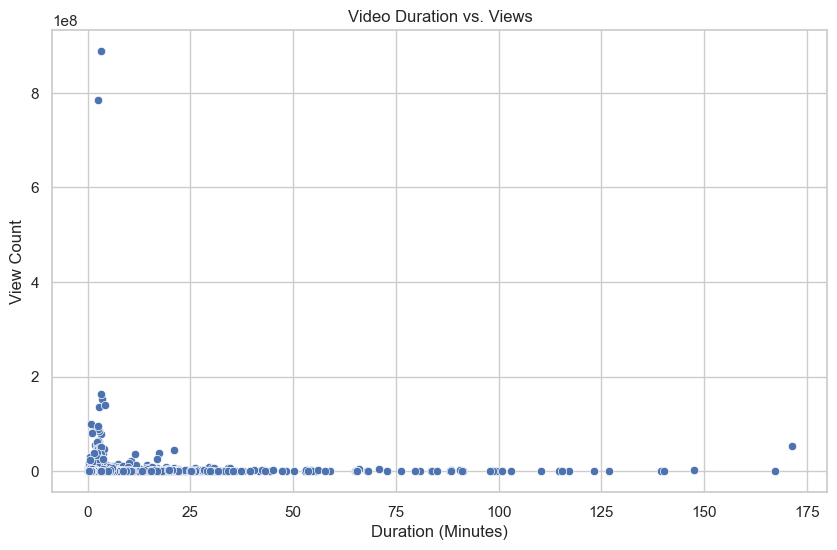

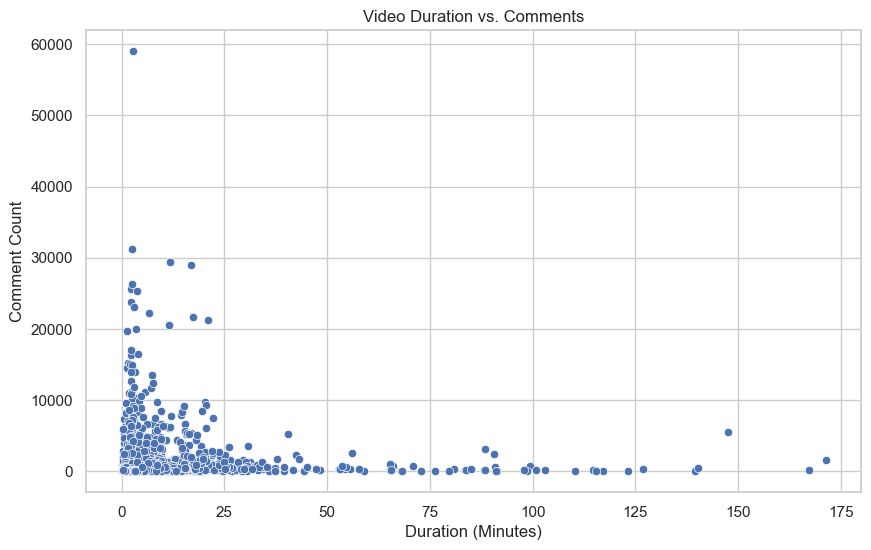

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Duration vs. Views
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="DurationMinutes", y="viewCount")
plt.title("Video Duration vs. Views")
plt.xlabel("Duration (Minutes)")
plt.ylabel("View Count")
plt.show()

# Duration vs. Comments
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="DurationMinutes", y="commentCount")
plt.title("Video Duration vs. Comments")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Comment Count")
plt.show()


In [8]:
views_corr = df["DurationMinutes"].corr(df["viewCount"])
print("Correlation between Duration and Views:", round(views_corr, 3))

comments_corr = df["DurationMinutes"].corr(df["commentCount"])
print("Correlation between Duration and Comments:", round(comments_corr, 3))


Correlation between Duration and Views: 0.001
Correlation between Duration and Comments: 0.056


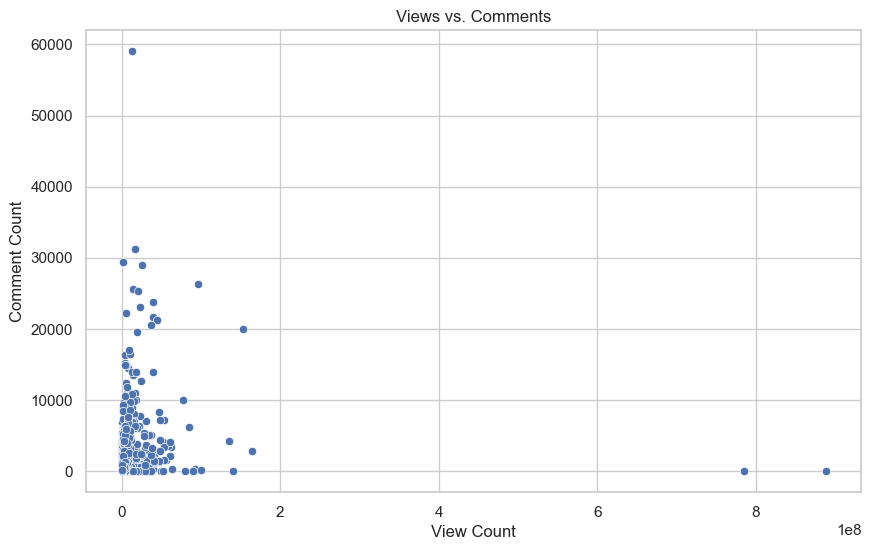

Correlation between Views and Comments: 0.143


In [9]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="viewCount", y="commentCount")
plt.title("Views vs. Comments")
plt.xlabel("View Count")
plt.ylabel("Comment Count")
plt.show()

# Correlation
corr_views_comments = df["viewCount"].corr(df["commentCount"])
print("Correlation between Views and Comments:", round(corr_views_comments, 3))


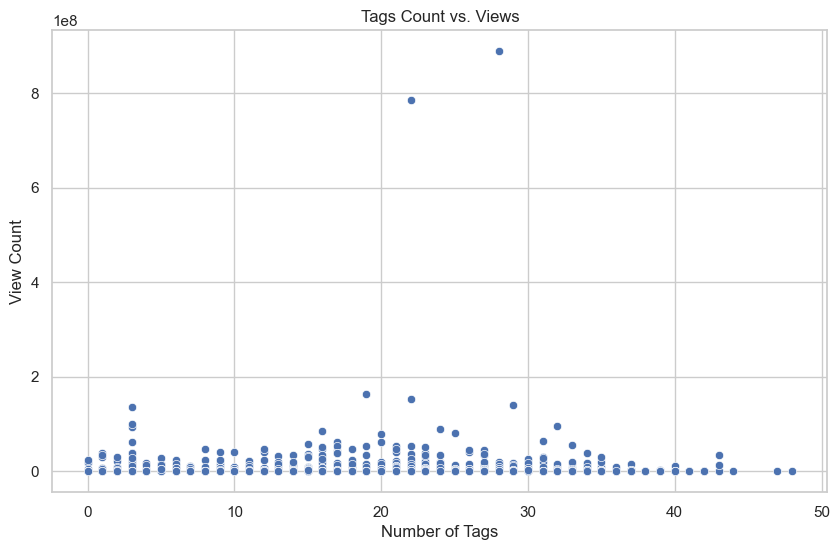

Correlation between Tags Count and Views: 0.007


In [10]:
# Scatter plot: TagsCount vs. Views
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="TagsCount", y="viewCount")
plt.title("Tags Count vs. Views")
plt.xlabel("Number of Tags")
plt.ylabel("View Count")
plt.show()

# Correlation
corr_tags_views = df["TagsCount"].corr(df["viewCount"])
print("Correlation between Tags Count and Views:", round(corr_tags_views, 3))


In [11]:
# Make sure to parse the publishedAt column to datetime
df["publishedAt_dt"] = pd.to_datetime(df["publishedAt"])

# Day of week (Monday=0, Sunday=6)
df["PublishDay"] = df["publishedAt_dt"].dt.day_name()

# Hour of day (0-23)
df["PublishHour"] = df["publishedAt_dt"].dt.hour

# Quick check
print(df[["publishedAt", "PublishDay", "PublishHour"]].head())


            publishedAt PublishDay  PublishHour
0  2024-12-20T08:00:00Z     Friday            8
1  2024-12-19T12:30:00Z   Thursday           12
2  2024-12-19T05:30:10Z   Thursday            5
3  2024-12-18T14:30:00Z  Wednesday           14
4  2024-12-18T13:30:05Z  Wednesday           13


In [12]:
# Group by day of week
day_engagement = df.groupby("PublishDay")[["viewCount", "commentCount", "likeCount"]].mean().reset_index()

# Sort by weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_engagement["PublishDay"] = pd.Categorical(day_engagement["PublishDay"], categories=weekday_order, ordered=True)
day_engagement = day_engagement.sort_values("PublishDay")

print(day_engagement)


  PublishDay     viewCount  commentCount     likeCount
1     Monday  2.433188e+06    647.121508  25658.530641
5    Tuesday  2.181236e+06    813.066580  31268.007823
6  Wednesday  3.008420e+06    592.903185  26537.114796
4   Thursday  1.354182e+06    678.260173  23865.073892
0     Friday  2.118497e+06    693.993734  26629.918648
2   Saturday  2.717408e+06    684.461087  29965.582723
3     Sunday  1.214689e+06    437.514196  19943.012618


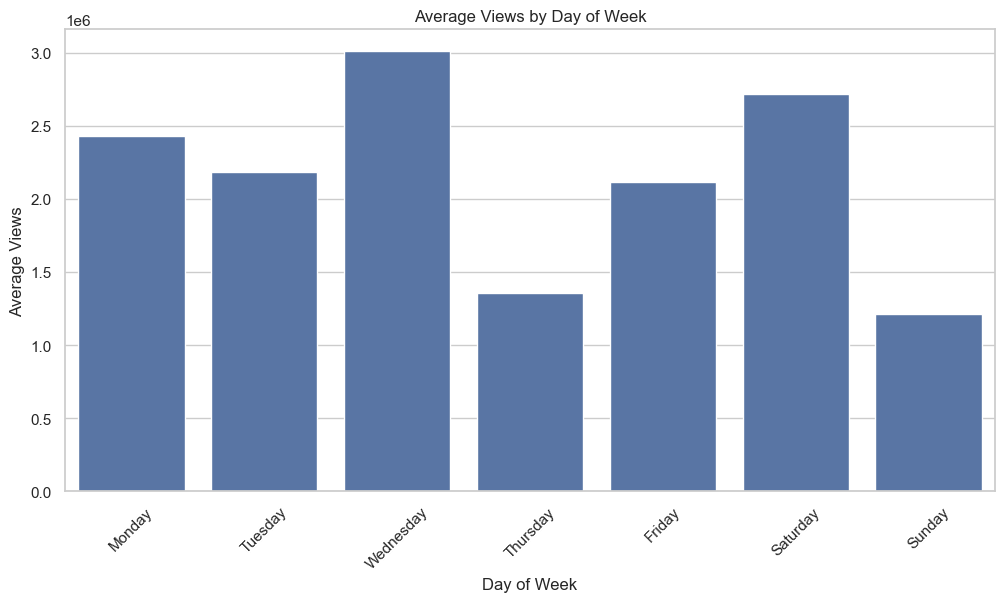

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x="PublishDay", y="viewCount", data=day_engagement)
plt.title("Average Views by Day of Week")
plt.ylabel("Average Views")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()


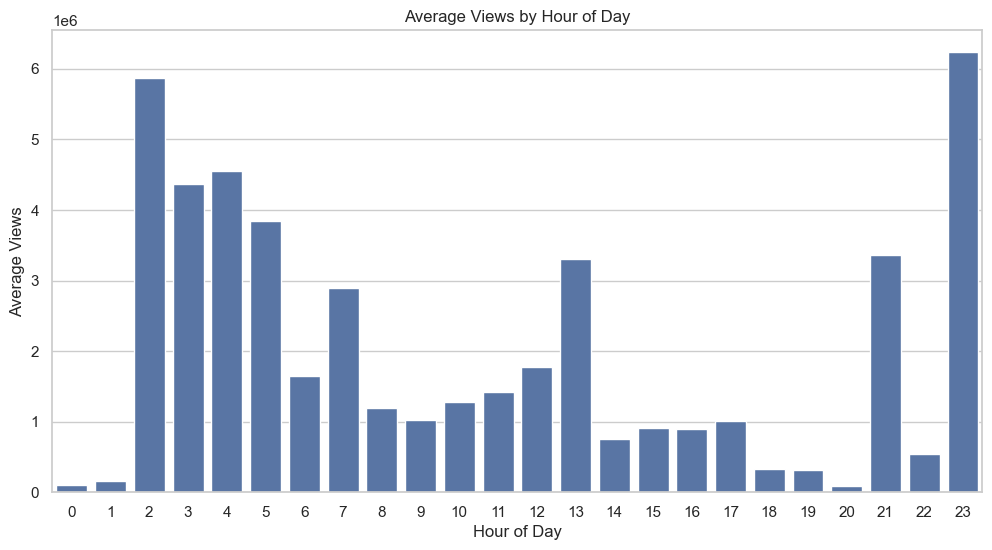

In [14]:
# Group by hour
hour_engagement = df.groupby("PublishHour")[["viewCount", "commentCount", "likeCount"]].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="PublishHour", y="viewCount", data=hour_engagement)
plt.title("Average Views by Hour of Day")
plt.ylabel("Average Views")
plt.xlabel("Hour of Day")
plt.show()


In [15]:
# Get the most viewed video
most_viewed = df.loc[df["viewCount"].idxmax()]

# Display details
print("Video ID:", most_viewed["video_id"])
print("Title:", most_viewed["title"])
print("Description:", most_viewed["description"])
print("Tags:", most_viewed["tags"])
print("View Count:", most_viewed["viewCount"])
print("Like Count:", most_viewed["likeCount"])
print("Comment Count:", most_viewed["commentCount"])
print("Duration (minutes):", most_viewed["DurationMinutes"])
print("Tags Count:", most_viewed["TagsCount"])
print("Title Length:", most_viewed["TitleLength"])
print("Publish Day:", most_viewed["PublishDay"])
print("Publish Hour:", most_viewed["PublishHour"])


Video ID: U15sCqscZAk
Title: Mighty Little Bheem | Bheem with a Beat | Netflix India
Description: Mighty Little Bheem has all the animals in the jungle dancing to his drum, but his mother doesn't like all the noise!

Catch Little Bheem on his big adventures in Mighty Little Bheem, streaming now, only on Netflix: https://www.netflix.com/watch/81191374?source=35

Watch more of Mighty Little Bheem here!
https://www.youtube.com/playlist?list=PLkF7RYTIPWddQHNgiZFb7PoBycpZ-_wpY

Playlists 
—————
Official Trailers
►► https://www.youtube.com/watch?v=nuSMGtZhsAc&list=PLkF7RYTIPWde8jy3TM_swHaZwhPojUPzb 

Official Teasers
►► https://www.youtube.com/watch?v=Nyz7suxlrI4&list=PLkF7RYTIPWdchaTB8buoKBFbE9qw-_FP5 

Tanmay Reacts
►► https://www.youtube.com/watch?v=J2qMuPQtv0c&list=PLkF7RYTIPWddw_jSmocypt1di1i7fg6QK 

Menu Please
►► https://www.youtube.com/watch?v=QtVXIdPzqiM&list=PLkF7RYTIPWdcnwY640drImE-HiqGOxM4X 

Netflix For Kids
►► https://www.youtube.com/watch?v=U15sCqscZAk&list=PLkF7RYTIPWdc2Mw1Zq

In [16]:
# Compute dataset averages
avg_views = df["viewCount"].mean()
avg_likes = df["likeCount"].mean()
avg_comments = df["commentCount"].mean()
avg_duration = df["DurationMinutes"].mean()
avg_tags = df["TagsCount"].mean()
avg_title_length = df["TitleLength"].mean()

print("\n--- Dataset Averages ---")
print("Average Views:", round(avg_views))
print("Average Likes:", round(avg_likes))
print("Average Comments:", round(avg_comments))
print("Average Duration (minutes):", round(avg_duration, 1))
print("Average Tags Count:", round(avg_tags, 1))
print("Average Title Length:", round(avg_title_length, 1))



--- Dataset Averages ---
Average Views: 2154679
Average Likes: 26357
Average Comments: 655
Average Duration (minutes): 4.5
Average Tags Count: 18.5
Average Title Length: 73.9


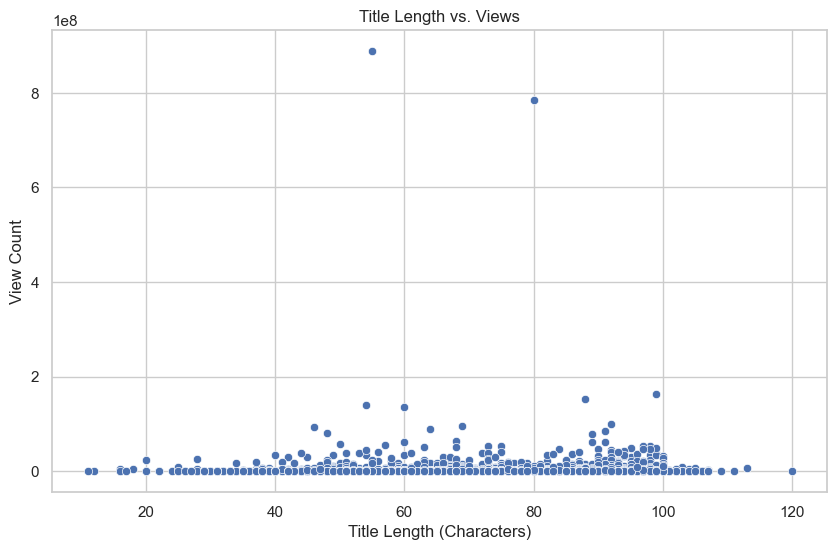

Correlation between Title Length and Views: 0.004


In [17]:
# Scatter plot: Title Length vs. Views
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="TitleLength", y="viewCount")
plt.title("Title Length vs. Views")
plt.xlabel("Title Length (Characters)")
plt.ylabel("View Count")
plt.show()

# Correlation
corr_title_views = df["TitleLength"].corr(df["viewCount"])
print("Correlation between Title Length and Views:", round(corr_title_views, 3))


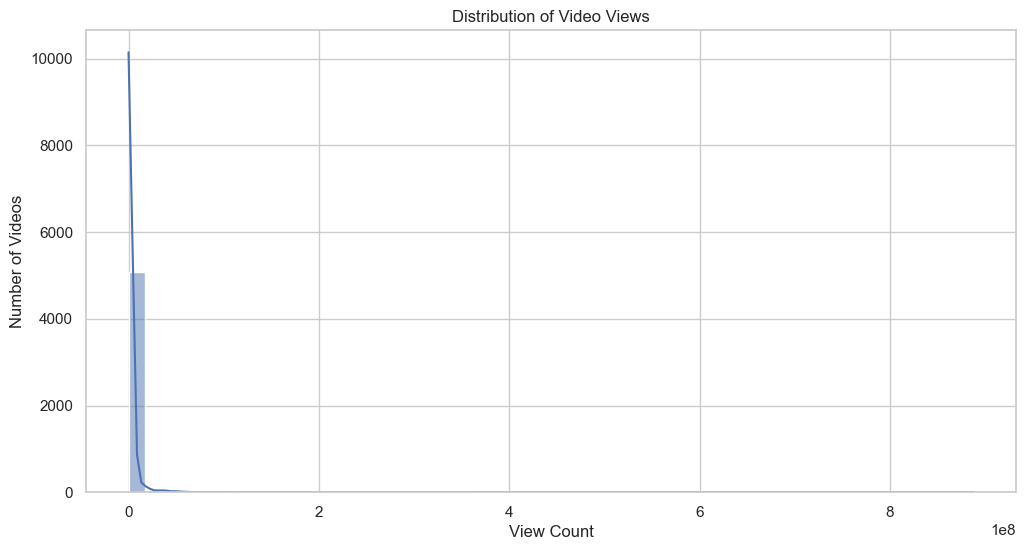

count    5.198000e+03
mean     2.154679e+06
std      1.794774e+07
min      0.000000e+00
25%      5.890825e+04
50%      2.210810e+05
75%      9.379675e+05
max      8.883307e+08
Name: viewCount, dtype: float64


In [18]:
# Histogram of view counts
plt.figure(figsize=(12,6))
sns.histplot(df["viewCount"], bins=50, kde=True)
plt.title("Distribution of Video Views")
plt.xlabel("View Count")
plt.ylabel("Number of Videos")
plt.show()

# Summary statistics
view_stats = df["viewCount"].describe()
print(view_stats)


In [19]:
# Create a list to hold rows
tag_rows = []

# Iterate over each video
for idx, row in df.iterrows():
    tags = row["tags"]
    if pd.isna(tags) or tags.strip() == "":
        continue
    # Assuming tags are comma separated
    tag_list = [tag.strip() for tag in tags.split(",")]
    for tag in tag_list:
        tag_rows.append({"tag": tag, "viewCount": row["viewCount"]})

# Convert to DataFrame
tags_df = pd.DataFrame(tag_rows)

# Group by tag and calculate average views
tag_views = tags_df.groupby("tag")["viewCount"].mean().reset_index()

# Sort by average views descending
tag_views = tag_views.sort_values("viewCount", ascending=False)

# Display top 20
print(tag_views.head(20))


                                       tag     viewCount
12622              'chhota bheem cartoon']  7.845588e+08
22706                       'pongal video'  3.924371e+08
7639                     'Shows for kids']  3.102341e+08
2410                               'Drums'  2.242001e+08
18374                      'kite festival'  1.962565e+08
10509                     'ankur warikoo']  1.642196e+08
14680  'fabulous lives of bollywood lives'  1.642196e+08
26964                   'tejasswi prakash'  1.642196e+08
27761                        'tony kakkar'  1.642196e+08
22674                      'playback 2022'  1.642196e+08
28274                    'urvashi rautela'  1.642196e+08
19923      'might little bheem new season'  1.604538e+08
30631                              ['Kids'  1.410153e+08
18297                       'kids lessons'  1.378996e+08
18892                'learning video kids'  1.378996e+08
5277                 'Mighty Little Bheem'  1.319555e+08
4046                           

In [20]:
# Filter videos with no tags
no_tags_df = df[df["tags"].isna() | (df["tags"].str.strip() == "")]

# Sort by view count
no_tags_sorted = no_tags_df.sort_values("viewCount", ascending=False)

# Display top 10
print(no_tags_sorted[["title", "viewCount", "likeCount", "commentCount", "publishedAt"]].head(10))


                                                  title  viewCount  likeCount  \
5112                               Heating Up | Netflix   24051981    26609.0   
5077              Ghoul - Silent Trailer I Netflix I HD   18523444    40118.0   
5056          Ghoul: The Room | Official [VR] | Netflix   18407319    41185.0   
5114                                   To-Dos | Netflix    4419563       36.0   
5113                                 Ad Break | Netflix    3582965      146.0   
5140                    Dangal | Main Trailer | Netflix    1253173     5052.0   
5157  Marvel's Iron Fist | 7 days of Iron Fist | Net...     295551      108.0   
5174  The Ivory Game - Official Trailer - Netflix Do...     292647      239.0   
4633  Little Things Season 3 | Mithila Palkar Helps ...     231591     4711.0   
5050                New on Netflix October 2018 | India     172218     2483.0   

      commentCount           publishedAt  
5112        2410.0  2018-04-02T07:10:31Z  
5077        2379.0  20

C:\Users\afnan\AppData\Local\Temp\ipykernel_9708\461502007.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["PublishMonth"] = df["publishedAt_dt"].dt.to_period("M")


  PublishMonth  VideoCount
0      2016-05           1
1      2016-06           3
2      2016-07           4
3      2016-08           5
4      2016-09           7


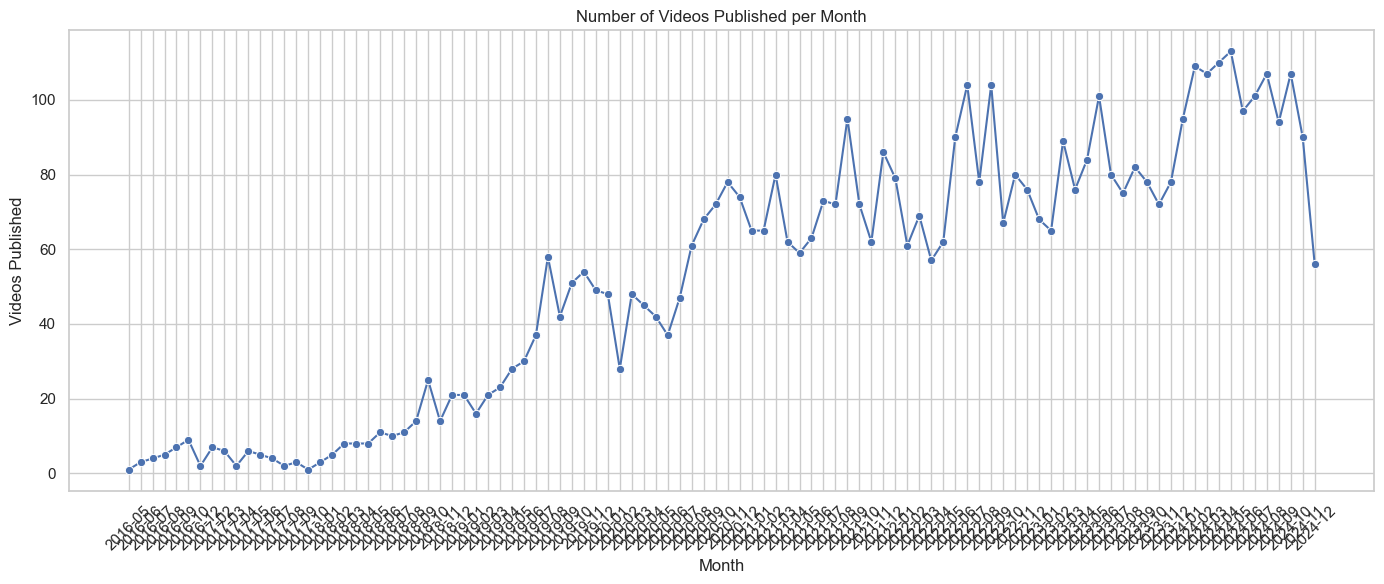

In [21]:
# Convert to datetime if not already done
df["publishedAt_dt"] = pd.to_datetime(df["publishedAt"])

# Create Year-Month column
df["PublishMonth"] = df["publishedAt_dt"].dt.to_period("M")

# Count videos per month
monthly_counts = df.groupby("PublishMonth").size().reset_index(name="VideoCount")

# Convert Period back to string for plotting
monthly_counts["PublishMonth"] = monthly_counts["PublishMonth"].astype(str)

# Display first rows
print(monthly_counts.head())

# Plot time series
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_counts, x="PublishMonth", y="VideoCount", marker="o")
plt.xticks(rotation=45)
plt.title("Number of Videos Published per Month")
plt.xlabel("Month")
plt.ylabel("Videos Published")
plt.tight_layout()
plt.show()


In [23]:
# Create list to hold all tags
all_tags = []

# Loop through rows
for idx, row in df.iterrows():
    tags = row["tags"]
    if pd.isna(tags) or tags.strip() == "":
        continue
    tag_list = [tag.strip() for tag in tags.split(",")]
    all_tags.extend(tag_list)

# Convert to Series
tags_series = pd.Series(all_tags)

# Count frequencies
tag_counts = tags_series.value_counts().reset_index()
tag_counts.columns = ["Tag", "Frequency"]

# Show top 20
print(tag_counts.head(20))


                                  Tag  Frequency
0                           'netflix'       2861
1                    ['netflix india'       2458
2                     'netflix shows'       2297
3                           'Netflix'        656
4                     'netflix india'        545
5                     'Netflix India'        436
6                    'netflix shows']        389
7                    'netflix movies'        190
8                      'kapil sharma'        164
9                     'ranbir kapoor'        160
10                         ['Netflix'        160
11              'kapil sharma comedy'        154
12                     'sunil grover'        152
13                           'comedy'        149
14    'sunil grover and kapil sharma'        146
15                        'bollywood'        143
16              'sunil grover comedy'        142
17  'kapil sharma show funny episode'        129
18                   'new on netflix'        129
19                  

In [24]:
# Avoid division by zero
df["EngagementRate"] = (df["likeCount"] + df["commentCount"]) / df["viewCount"].replace(0, 1)

# Sort descending
engaged_videos = df.sort_values("EngagementRate", ascending=False)

# Show top 10
print(engaged_videos[["title", "viewCount", "likeCount", "commentCount", "EngagementRate"]].head(10))


                                                  title  viewCount  likeCount  \
342   Geeked Week 2024 LIVE Showcase | Ft. Squid Gam...          0      246.0   
0     Meet THE REAL Honey Singh | Yo Yo Honey Singh:...      52864     7111.0   
1674  Game Hai? Ya Sachhi Ka Extraction? | @Thugesh ...     269422    28804.0   
1321  Love And Life Lessons By Kamal Haasan | Anbe S...      24545     2435.0   
1356  Survival Game Show With @FukraInsaan | Kaala P...    1231836   122532.0   
3938  @triggeredinsaan's Engineering Life Was Like K...    1365480   133907.0   
3846  What is @triggeredinsaan's Lakshya? | Triggere...    1140810   110630.0   
3284  Which Anime Universe Would You like to Visit? ...      51368     3828.0   
3836  @Mythpat Takes The Ultimate Mimicry Challenge ...    2082222   186586.0   
3980  Why Bhuvan Bam has a problem with Netflix | @B...    1509471   135659.0   

      commentCount  EngagementRate  
342            0.0      246.000000  
0            394.0        0.141968